# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df.shape

(10886, 19)

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Даних 10886 рядків, 19 колонок з урахуванням доданих і колонка datetime стала індексом, тому не враховується методом `shape` - отже фактично колонок 20
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


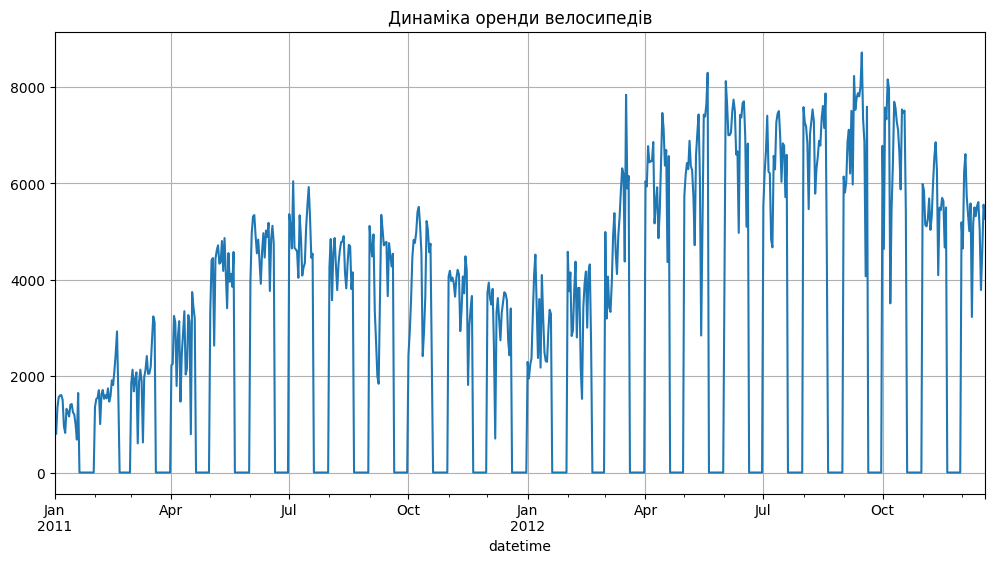

In [5]:
daily_count = df['count'].resample('D').sum()
daily_count.plot(
    figsize = (12, 6),
    title = 'Динаміка оренди велосипедів',
    grid = True
);

In [6]:
daily_count.head(30)

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
2011-01-06    1606
2011-01-07    1510
2011-01-08     959
2011-01-09     822
2011-01-10    1321
2011-01-11    1263
2011-01-12    1162
2011-01-13    1406
2011-01-14    1421
2011-01-15    1248
2011-01-16    1204
2011-01-17    1000
2011-01-18     683
2011-01-19    1650
2011-01-20       0
2011-01-21       0
2011-01-22       0
2011-01-23       0
2011-01-24       0
2011-01-25       0
2011-01-26       0
2011-01-27       0
2011-01-28       0
2011-01-29       0
2011-01-30       0
Freq: D, Name: count, dtype: int64

1) Графік має "заломи" тому, що сумарна кількість орендованих велосипедів значно коливається в денному розрізі, до того ж в даних немає значень для дат більше 19 числа кожного місяця. Можливо в служби оренди в ці дати технічне обслуговування, а можливо проблеми з базою даних. В цілому, не зручно аналізувати графік в поденному розрізі за період 2 роки. Прибирати нульові значення не є доцільним, тому що це викривляє загальну картину (даних дійсно немає). Проте, щоб зробити графік більш читабельним можна побудувати його в розрізі місяців. Зважаючи, що даних з 20 числа по кінець місяця немає в кожному місяці, то застосування місячного розрізу для аналізу динаміки є більш доцільним.

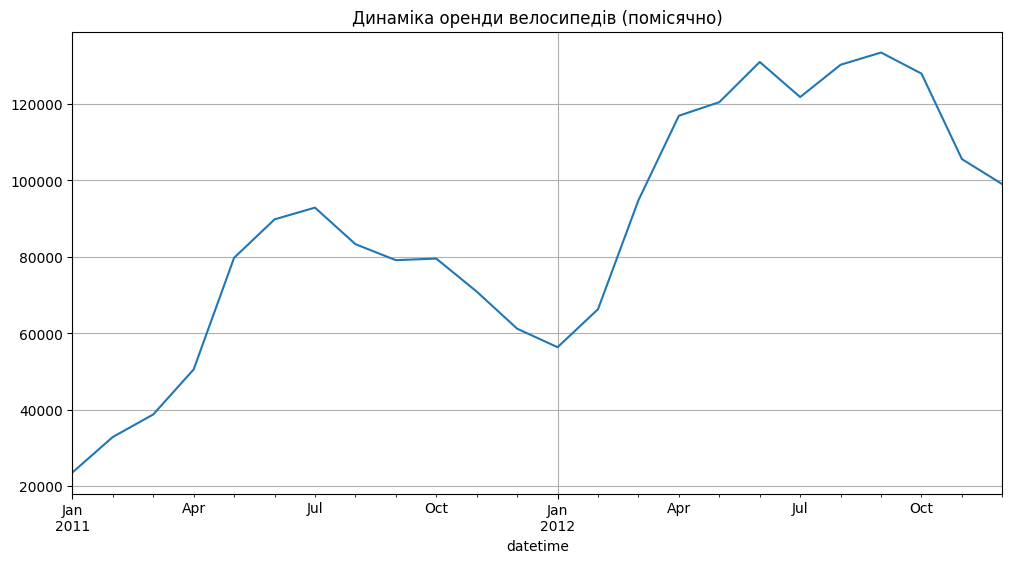

In [7]:
monthly_count = df['count'].resample('ME').sum()
monthly_count.plot(
    figsize = (12, 6),
    title = 'Динаміка оренди велосипедів (помісячно)',
    grid = True
);

2) В щомісячному розрізі видно, що в 2012 році обсяги оренди значно зросли в порівнянні з 2011 роком. На початку року обсяг оренди мінімальний, що може бути пов'язано зі святами та несприятливими погодними умовами. Проте, зважаючи, що на початку 2012 року обсяг оренди такий самий як в квітні 2011, то можливо компанія в 2011 лише починала свою діяльність, а в 2012 розширила географію обслуговування і кількість велосипедів доступних до оренди.
3) Кількість орендованих велосипедів зростає влітку і знижується взимку, що пояснюється погодними умовами. Цікаво, що  в 2011 році найбільше велосипедів було орендовано в липні, в той час як в 2012 році в липні спостерігається спад порівняно з іншими літніми місяцями. Доцільно додатково дослідити причини спаду в липні 2012 року.
4) На щоденному графіку видно, що в деякі дні є різкий спад порівняно з середнім значенням. А в інші дні, наприклад в кінці березня 2012, аномально високе значення.
Низькі значення можуть бути пов'язані з поганими погодними умовами або святами.
Знайти аномально низькі значення "викиди" - відхилення більше за 2 стандартних відхилення від середнього, можна кодом нижче.

In [8]:
daily_count[daily_count > 0].groupby(daily_count[daily_count > 0].index.to_period('M')).apply(
    lambda group: group[group < (group.mean() - 2 * group.std())]
    )

datetime  datetime  
2011-03   2011-03-06     605
          2011-03-10     623
2011-04   2011-04-16     795
2011-05   2011-05-04    2633
2011-06   2011-06-16    3767
2011-09   2011-09-07    1996
          2011-09-08    1842
2011-11   2011-11-16    1817
2011-12   2011-12-07     705
2012-02   2012-02-12    1529
2012-04   2012-04-18    4367
2012-05   2012-05-14    2843
2012-06   2012-06-01    4127
2012-07   2012-07-08    4672
2012-08   2012-08-19    4549
2012-09   2012-09-18    4073
2012-10   2012-10-07    3510
2012-11   2012-11-13    4094
2012-12   2012-12-09    3228
Name: count, dtype: int64


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

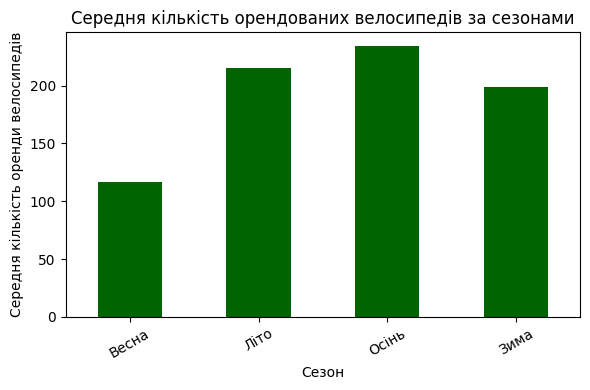

In [9]:
seasons_mean = df.groupby('season')['count'].mean()

sm = seasons_mean.plot.bar(
    figsize=(6, 4),
    title='Cередня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Cередня кількість оренди велосипедів',
    color='darkgreen'
);

sm.set_xticklabels(['Весна', 'Літо', 'Осінь', 'Зима'])
plt.xticks(rotation=30)
plt.tight_layout()

1) Найбільша середня кількість оренди велосипедів восени (а точніше з липня по вересень, бо так сезони розподілені в даних)
2) Можна припустити з липня, що з липня по вересень найбільш сприятливі погодні умови і тому кількість оренди велосипедів зростає. Так як дані взято з Індії, то там в липні починається новий навчальний рік і зростання кількості оренди велосипедів може бути по'язано зі зростанням активності студентів, які можуть брати велосипеди в оренду, як достатньо бюджетний спосіб пересування.
3) Середня погодинна кількість орендованих велосипедів в найбільш популярний сезон (з липня по вересень) вдвіче більша ніж в низький сезон (з січня по березень).

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


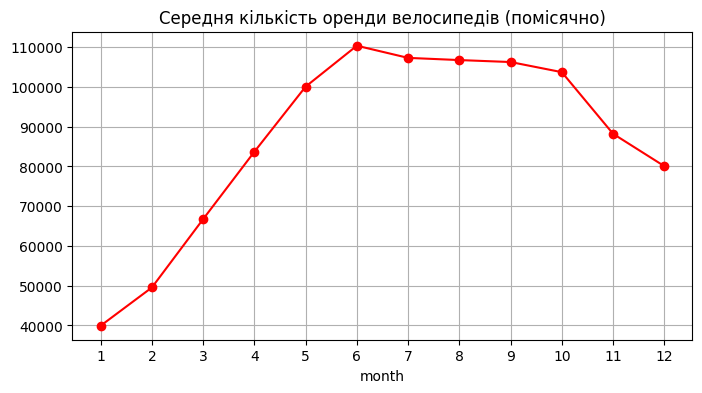

In [10]:
monthly_sum = df.groupby(['year','month'])['count'].sum()
monthly_mean = monthly_sum.groupby('month').mean()
mm = monthly_mean.plot.line(
    figsize = (8, 4),
    title = 'Середня кількість оренди велосипедів (помісячно)',
    grid = True,
    marker = 'o',
    color = 'red'
)
mm.set_xticks(monthly_mean.index);

1) Пік оренди спостерігається в червні - близько 110,000 оренд в середньому, що є найвищою точкою на графіку.
Найнижче значення у січні - близько 40,000 оренд, вторинний спад спостерігається у грудні - близько 80,000 оренд
2) Результати збігаються з попереднім завданням - не дивлячись на те, що пік в червні, найбльша сумарна кількість за сезон з липня по вересень
3) Для аналізу впливу погоди на динаміку оренди потрібно провести додаткове дослідження, проте дещо парадоксально, що збільшення оренди спостерігається в липні, саме тоді, коли в Індії сезон мусонів і погода не дуже сприятлива для пересування велосипедом, на відміну від зимових місяців, коли погода є більш комфортною для подорожей і спостерігається пік туристичного сезону. Прохолодно лише в північних регіонах, де також може випадати сніг.
Якщо б дані були з європейської частини континенту, то графік би цілком відповідав динаміці погодних умов

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

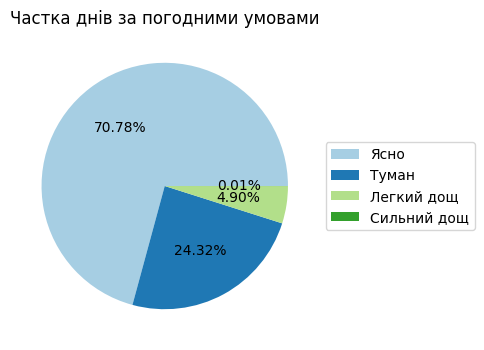

In [11]:
weather_count = df.groupby('weather')['count'].sum()
wct = weather_count.plot.pie(
    figsize = (4, 4),
    title = 'Частка днів за погодними умовами',
    grid = False,
    autopct = '%1.2f%%',
    colors = plt.cm.Paired.colors,
    labels = None,
    ylabel = ''
)
wct.legend(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'], loc='center left', bbox_to_anchor=(1, 0.5));

1) Ясна погода складає 70.78% всіх днів. Це означає, що більше двох третин часу спостерігалися сприятливі погодні умови.
2) Дні із сильним дощем присутні в датасеті, але їх дуже мало - лише 0.01%.
3) Ясна погода позитивно впливає на оренду велосипедів. Туман і дощ зазвичай знижують попит на оренду велосипедів через дискомфорт.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

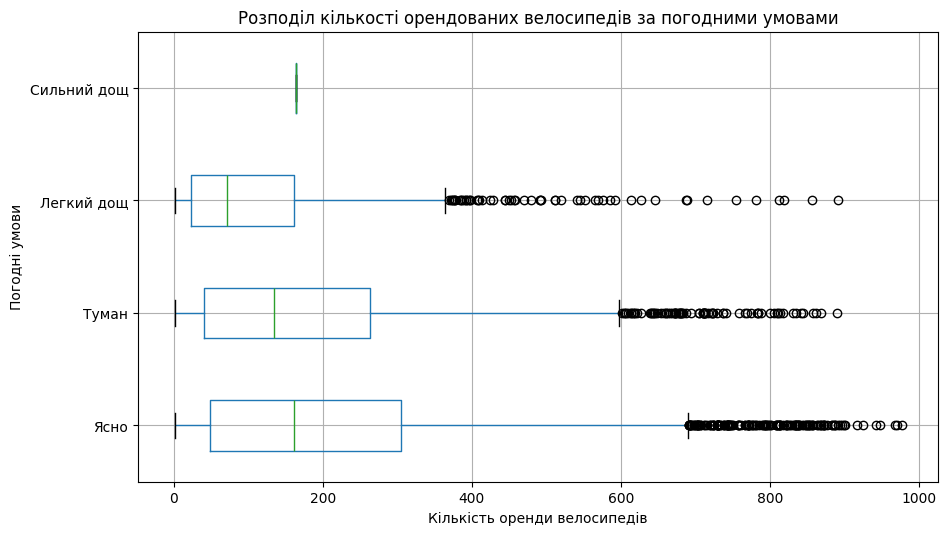

In [12]:
df[['weather', 'count']].boxplot(
    figsize = (10, 6), 
    by = 'weather',
    xlabel = 'Кількість оренди велосипедів',
    ylabel = 'Погодні умови',
    vert = False
)
plt.title('Розподіл кількості орендованих велосипедів за погодними умовами')
plt.yticks(range(1, 5),['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
plt.suptitle('');

1) Ясна погода має найбільший розкид у кількості оренди - це показує найдовший ящик та найширший розкид значень від мінімуму до максимуму.
2) Викиди присутні при всіх типах погоди, крім сильного дощу, в правій частині графіка - незвично високі значння оренди
3) Ясна погода має найвище медіанне значення оренди, а легкий дощ - найнижче. Цікаво, що Сильний дощ має таке саме високе значення медіани, як і ясна погода. Це може пояснюватись малою кількістю спостережень, яка може приводити до викривлення даних.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

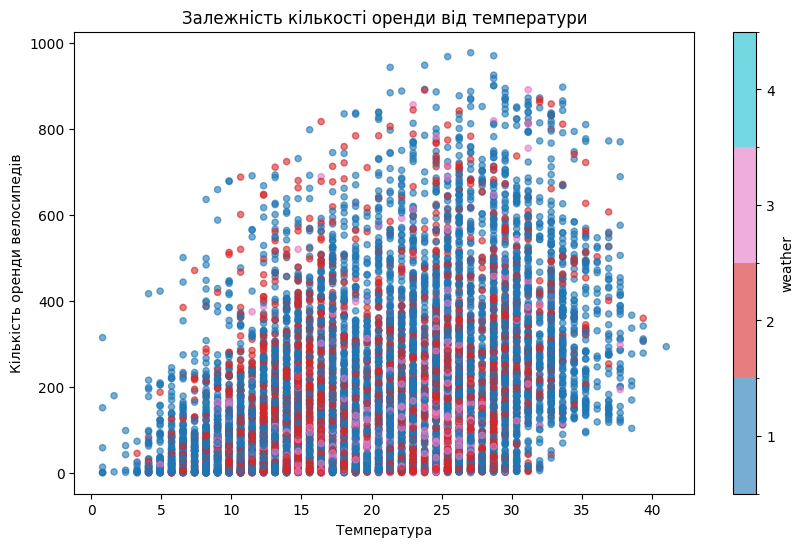

In [13]:
df['weather'] = df['weather'].astype('category')
df.plot.scatter(
    figsize=(10, 6),
    x = 'temp',
    xlabel = 'Температура',
    y = 'count',
    ylabel = 'Кількість оренди велосипедів',
    c = 'weather',
    colormap='tab10',
    title = 'Залежність кількості оренди від температури',
    alpha=0.6
)
plt.show()

Виходячи з графіка зв'язку між погодою, температурою та кількістю оренди немає. Незалежно від погоди і майже незалежно від температури кількість оренди коливається від 0 до 600-700, а в рідких випадках до майже 1000 на годину

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

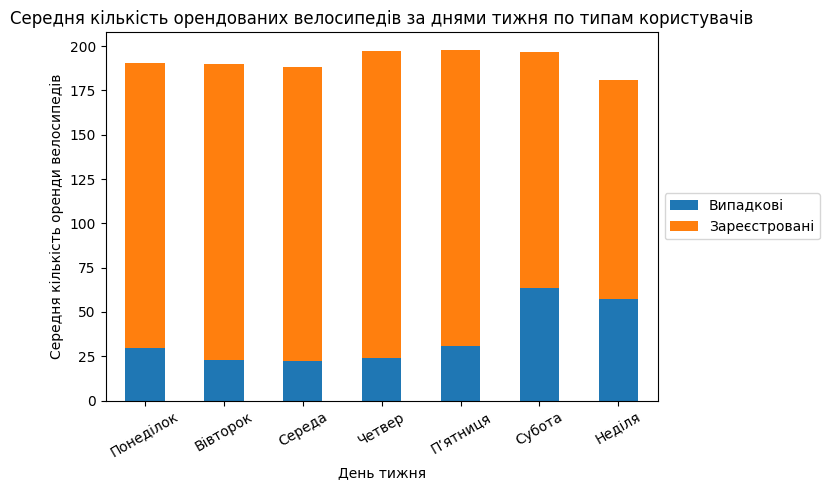

In [14]:
df['weekday_num'] = df['weekday_num'].astype('category')
weekday_mean = df.groupby('weekday_num', observed=False)[['casual', 'registered']].mean()

wm = weekday_mean.plot.bar(
    figsize=(8, 5),
    stacked=True,
    title='Cередня кількість орендованих велосипедів за днями тижня по типам користувачів',
    xlabel='День тижня',
    ylabel='Cередня кількість оренди велосипедів',
    
);

plt.xticks(range(7),['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя'], rotation=30)
wm.legend(['Випадкові', 'Зареєстровані'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout();

1) В робочі дні більше оренд від зареєстрованих користувачів порівняно з вихідними
2) Зареєстровані користвачі можуть використовувати велосипеди для регулярних поїздок на роботу. Коли поїздки постійні зареєструватись зручніше, можливо також присутні бонуси для зареєстрованих користувачів і можна економити. У вихідні велосипеди можуть орендувати для прогулянок, або спонтанних поїздок